In [219]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
path = r'C:\Users\gurpr\Documents\UpGrad-Hackathon\season7TeamData\Player'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.drop(df.tail(1).index,inplace=True)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [221]:
frame.columns
#frame.info()

Index(['career_best_points', 'defence_touch_points', 'defending_bonus_points',
       'empty_raid', 'green_cards', 'high_5s', 'location', 'match_played',
       'name', 'not_out_percentage', 'player_id', 'player_team',
       'player_team_arr', 'point', 'points_defence_offence',
       'points_per_match_raid_tackle', 'raid_bonus_points',
       'raid_map_locations', 'raid_points_per_match', 'raid_touch_points',
       'raids', 'red_cards', 'role', 'series_id', 'series_name',
       'success_raid_percent', 'success_raids', 'success_tackles',
       'success_tackles_per_match', 'super_10s', 'super_raids',
       'super_tackles', 'tackle_bonus_points', 'tackle_success_rate',
       'tackles', 'total_capture_points', 'total_defending_points',
       'total_raid_points', 'total_tackle_points', 'unsuccesful_tackles',
       'unsuccess_raids', 'yellow_cards'],
      dtype='object')

In [222]:
# adding new features with names as successful_raid_perc
frame.to_csv('merged_player.csv',index=False)
frame.fillna(0)
frame['successful_raid_perc'] = round(100*(frame['success_raids']/frame['raids']))
frame['successful_tackle_perc'] = round(100*(frame['success_tackles']/frame['tackles']))

In [218]:
raid_tackle_points = frame.groupby(['player_id','name','series_id'])['raids','raid_points_per_match','unsuccess_raids','success_tackles_per_match','unsuccesful_tackles','successful_raid_perc','successful_tackle_perc','success_raids','tackles','success_tackles','match_played'].agg('sum').reset_index().sort_values('raids', ascending=False)

In [223]:
def playersRaidOratcklePercent(season, nameList, frame, raidOrTackleSuccessPercent):
    a = frame[(frame['name'].isin(nameList)) & (frame['series_id'] == season)]
    fig, ax = plt.subplots(figsize=(30,6))
    b = a[(a['series_id'] == season)]
    if not b.empty:
        sns.barplot(x ='name', y=raidOrTackleSuccessPercent, data=b)
    else:
        print('empty')

In [224]:
def playersRaidPointsOrSuccessTacklesPerMatch(season, nameList, frame, RaidPointsOrSuccessTacklesPerMatch):
    a = frame[(frame['name'].isin(nameList)) & (frame['series_id'] == season)]
    fig, ax = plt.subplots(figsize=(30,6))
    b = a[(a['series_id'] == season)]
    if not b.empty:
        sns.barplot(x ='name', y=RaidPointsOrSuccessTacklesPerMatch, data=b)
    else:
        print('empty')

In [225]:
def playersUnsuccessfulRaidsOrTackles(season, nameList, frame,UnsuccessfulRaidsOrTackles):
    a = frame[(frame['name'].isin(nameList)) & (frame['series_id'] == season)]
    fig, ax = plt.subplots(figsize=(30,6))
    b = a[(a['series_id'] == season)]
    if not b.empty:
        sns.barplot(x ='name', y=UnsuccessfulRaidsOrTackles, data=b)
    else:
        print('empty')

### Fetching top 10 players in tackles and raid category where at least they had played 10 matches in the current season

In [226]:
topSuccessRaidplayers = raid_tackle_points[(raid_tackle_points['series_id'] == 49) & (raid_tackle_points['match_played'] > 10)].sort_values('successful_raid_perc', ascending=False).head(10)[['name','player_id','match_played','successful_raid_perc']]
topSuccessTackleplayers = raid_tackle_points[(raid_tackle_points['series_id'] == 49) & (raid_tackle_points['match_played'] > 10)].sort_values('successful_tackle_perc', ascending=False).head(10)[['name','player_id','match_played','successful_tackle_perc']]
topSuccessTackleplayers

,name,player_id,match_played,successful_tackle_perc
600,Sonu Jaglan,2485,13,75.0
518,Siddharth Sirish Desai,2026,16,60.0
489,More GB,772,16,58.0
532,Surender Gill,2286,14,58.0
272,Fazel Atrachali,259,17,57.0
561,Sumit,2330,17,55.0
135,Sandeep Narwal,142,17,54.0
359,Vishal Bhardwaj,358,16,52.0
458,Nitesh Kumar,725,17,51.0
433,Baldev Singh,621,18,51.0


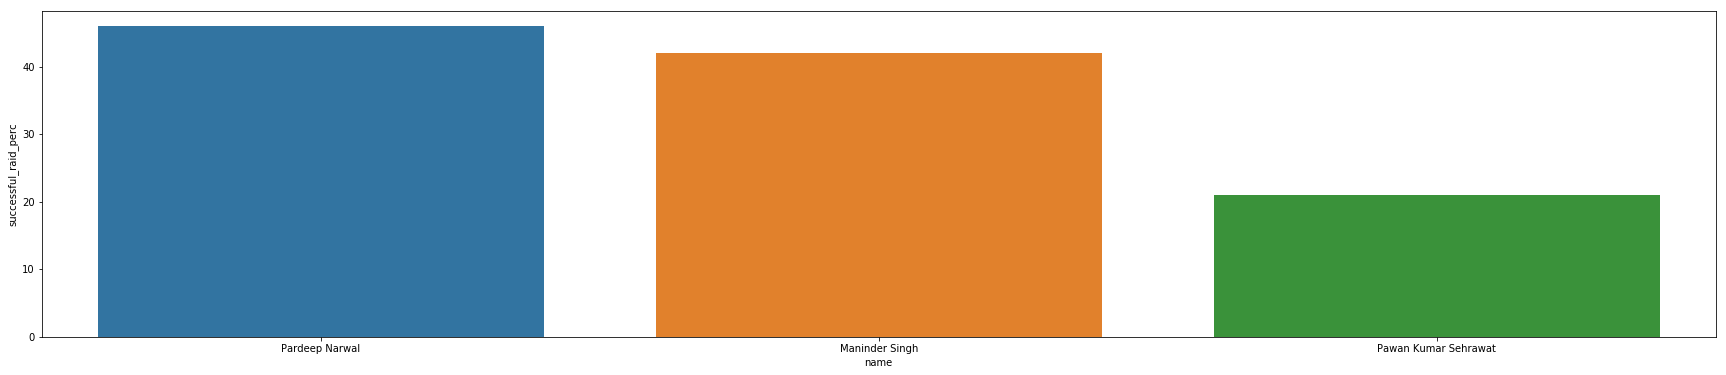

In [227]:
playersRaidOratcklePercent(8, topSuccessRaidplayers['name'].to_list(), raid_tackle_points, 'successful_raid_perc')

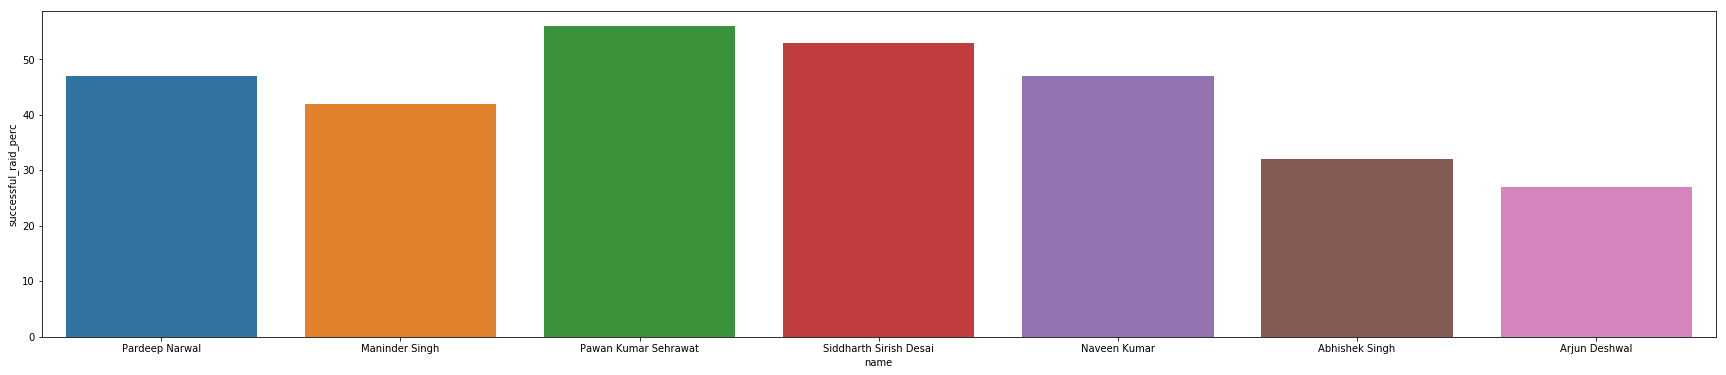

In [228]:
playersRaidOratcklePercent(26, topSuccessRaidplayers['name'].to_list(), raid_tackle_points, 'successful_raid_perc')

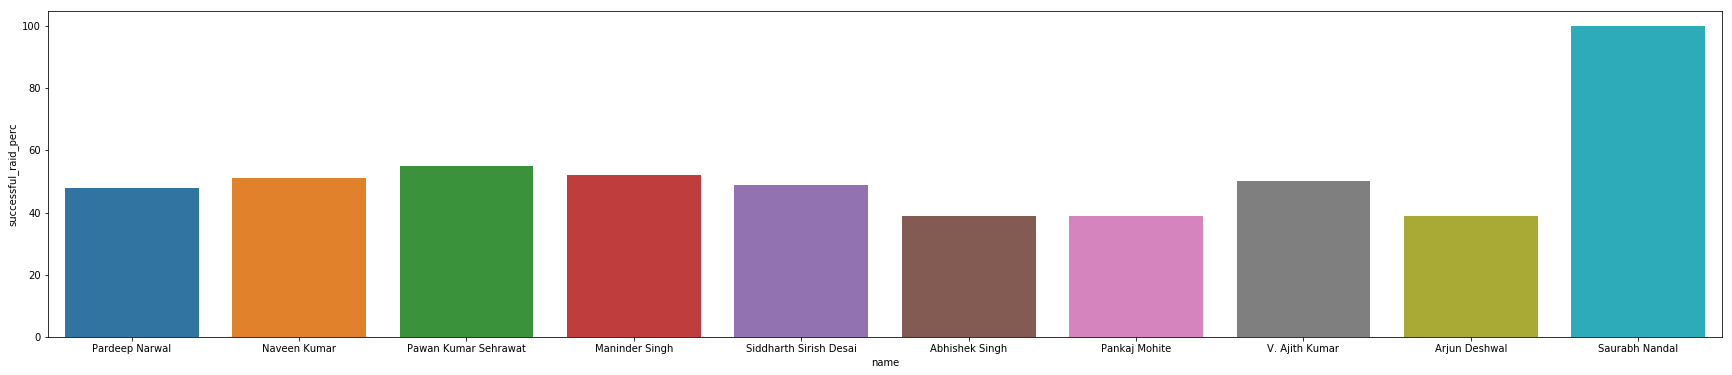

In [229]:
playersRaidOratcklePercent(49, topSuccessRaidplayers['name'].to_list(), raid_tackle_points, 'successful_raid_perc')

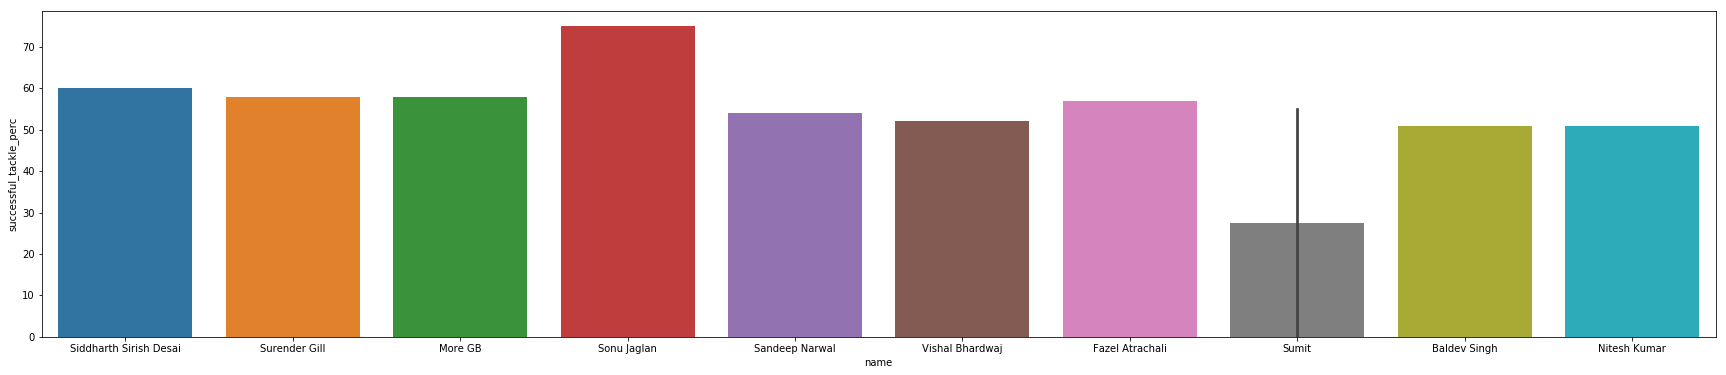

In [230]:
# successful tackle perc.
playersRaidOratcklePercent(49, topSuccessTackleplayers['name'].to_list(), raid_tackle_points, 'successful_tackle_perc')

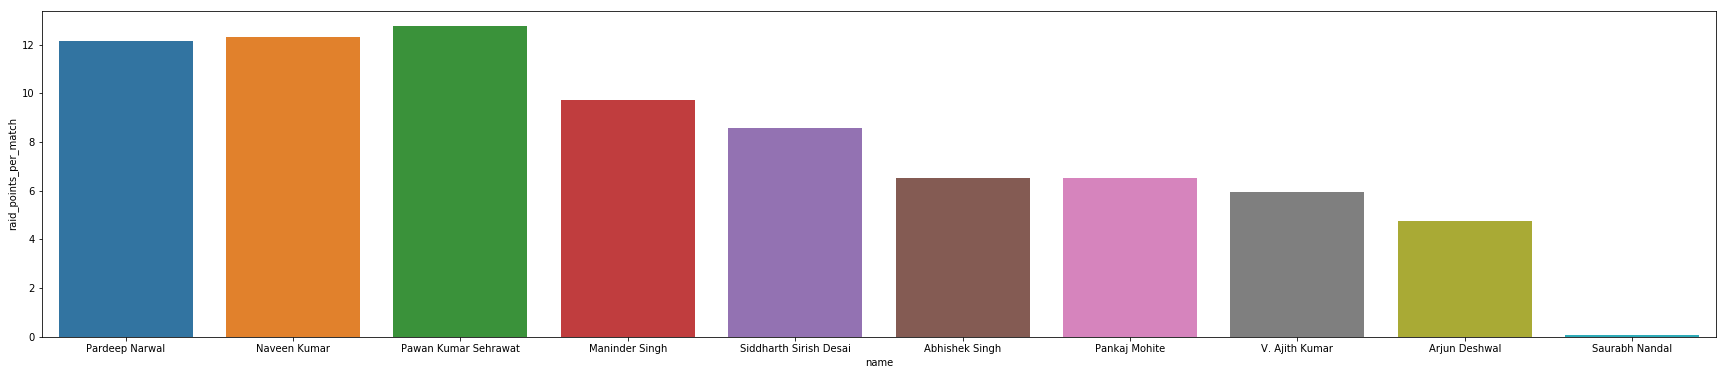

In [231]:
playersRaidPointsOrSuccessTacklesPerMatch(49, topSuccessRaidplayers['name'].to_list(), raid_tackle_points, 'raid_points_per_match')

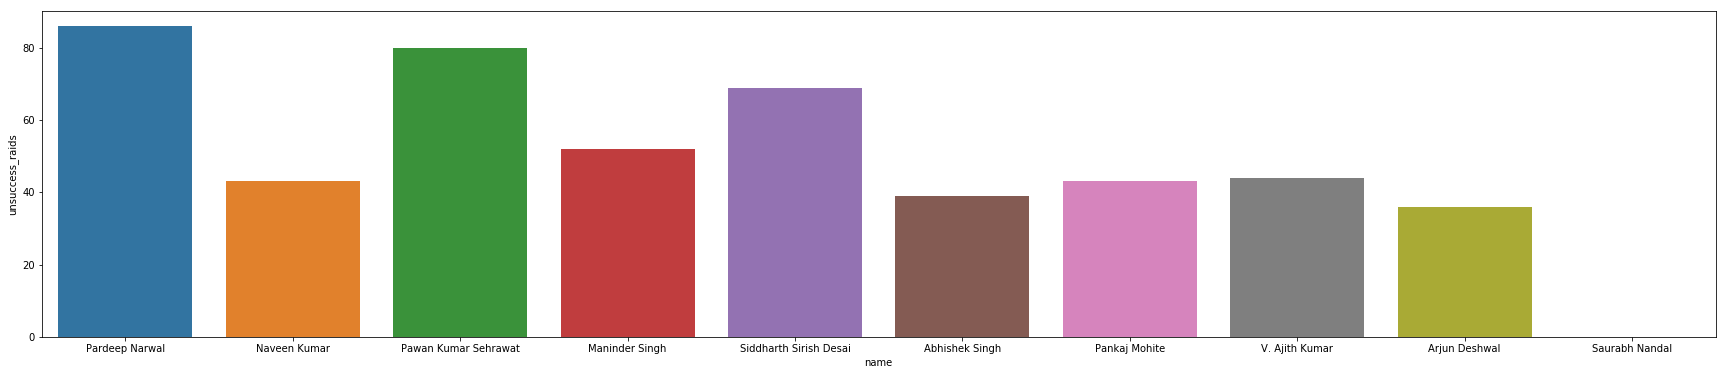

In [232]:
playersUnsuccessfulRaidsOrTackles(49, topSuccessRaidplayers['name'].to_list(), raid_tackle_points, 'unsuccess_raids')

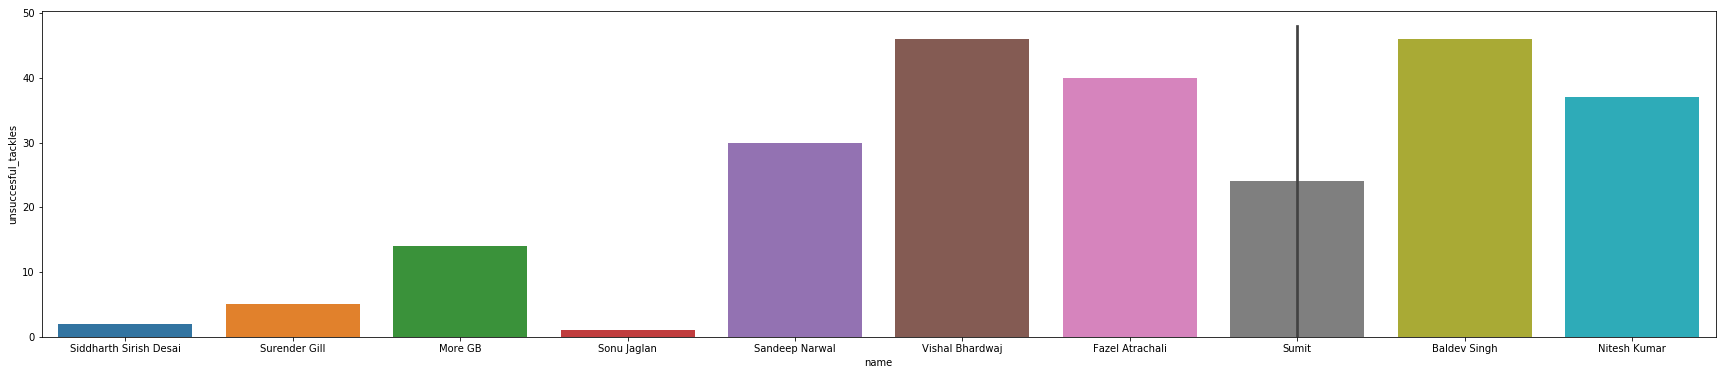

In [233]:
# unsuccesful tackle perc in top 10 successful tackle perc players
playersUnsuccessfulRaidsOrTackles(49, topSuccessTackleplayers['name'].to_list(), raid_tackle_points, 'unsuccesful_tackles')

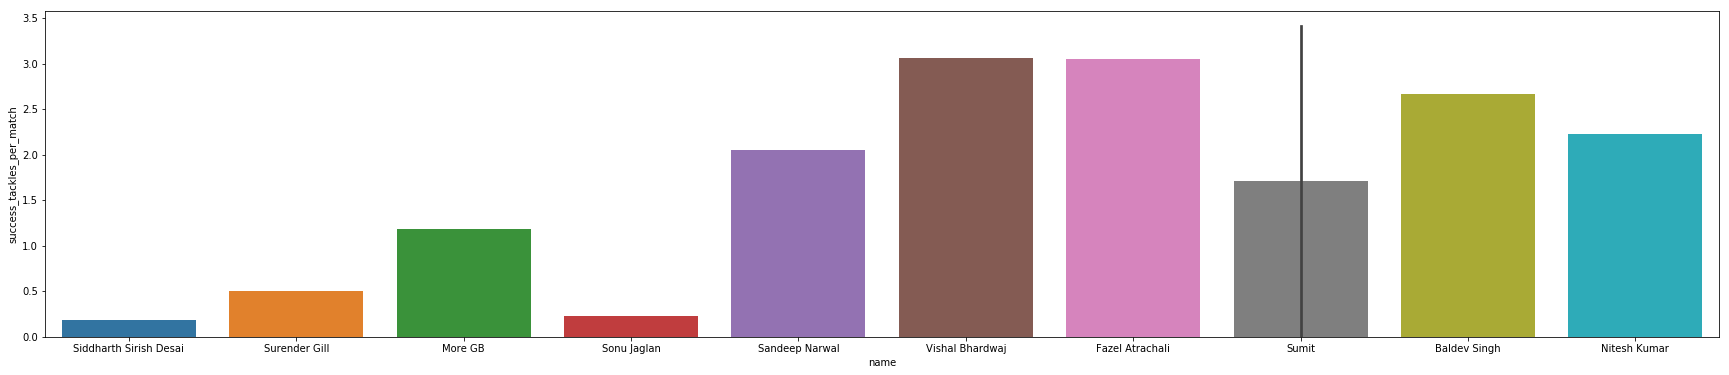

In [234]:
playersRaidPointsOrSuccessTacklesPerMatch(49, topSuccessTackleplayers['name'].to_list(), raid_tackle_points, 'success_tackles_per_match')